In [55]:
from typing import List, Tuple

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

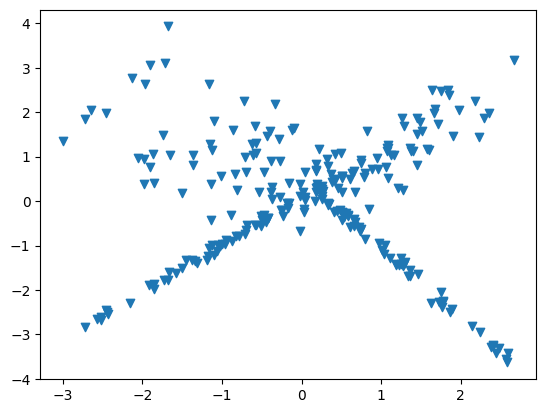

In [56]:
X, y = make_classification(n_samples=250, n_features=2, n_redundant=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='v')

In [57]:
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def isLeaf(self) -> bool:
        if self.value is not None:
            return True
        else:
            return False

In [58]:
class DecisionTree():
    def __init__(self, min_samples=2, max_depth=4):
        self.root = None
        self.min_samples = min_samples
        self.max_depth = max_depth

    
    def splitData(self, X: List, threshold: int) -> Tuple:
        left_data, right_data = np.argwhere(X <= threshold), np.argwhere(X > threshold)
        return left_data, right_data

    
    def calcEntropy(self, y: List) -> float:
        proba = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proba if p > 0])


    def infoGain(self, X: List, y: list, threshold: float) -> float:
        n = len(y)
        left_data, right_data = self.splitData(X, threshold)
        n_l, n_r = len(left_data), len(right_data)

        parent_loss = self.entropy(y)
        child_loss = np.sum((n_l / n) * self.entropy(y[left_data]), (n_r / n) * self.entropy(y[right_data]))
        return parent_loss - child_loss


    def bestSplit(self, X, y, feature):
        pass


    def buildTree():
        pass


    def fit():
        pass


    def predict():
        pass

SyntaxError: expected ':' (2883368714.py, line 28)

In [ ]:
imported_dt = DecisionTreeClassifier(criterion='entropy')
imported_dt.fit(X_train, y_train)
print(imported_dt.predict(X_test))